# <b><p style="background-color: #ff6200; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Task 33-> Neural Networks Basics (Perceptron, Activation Functions)</p>

# What are Neural Networks?
Neural Networks are computational models that mimic the complex functions of the human brain. The neural networks consist of interconnected nodes or neurons that process and learn from data, enabling tasks such as pattern recognition and decision making in machine learning. The article explores more about neural networks, their working, architecture and more.

The ability of neural networks to identify patterns, solve intricate puzzles, and adjust to changing surroundings is essential. Their capacity to learn from data has far-reaching effects, ranging from revolutionizing technology like natural language processing and self-driving automobiles to automating decision-making processes and increasing efficiency in numerous industries. The development of artificial intelligence is largely dependent on neural networks, which also drive innovation and influence the direction of technology.


## <span style='color:#ff6200'> Importing Libraries</span>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

## <span style='color:#ff6200'> Generating Synthetic Dataset</span>

In [2]:
np.random.seed(42)
X = np.random.rand(500, 2)

true_weights = np.array([[3], [5]])
y = np.dot(X, true_weights) + 4  
y += np.random.randn(500, 1) * 0.5  

X.shape, y.shape

((500, 2), (500, 1))

# <b><span style='color:#ff6200'> Simple Neural Network</span>

In [3]:
class SimpleNeuralNetwork:
    def __init__(self, input_size=2, hidden_size=2, output_size=1, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        np.random.seed(42)
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.01
        self.b2 = np.zeros((1, self.output_size))

    def relu(self, Z):
        return np.maximum(0, Z)

    def relu_derivative(self, Z):
        return Z > 0

    def forward_propagation(self, X):
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = self.relu(Z1)
        Z2 = np.dot(A1, self.W2) + self.b2
        return Z2, Z1, A1

    def compute_mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def backward_propagation(self, X, y_true, Z1, A1, y_pred):
        m = X.shape[0]
        
        dZ2 = y_pred - y_true
        dW2 = np.dot(A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.relu_derivative(Z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        
        return dW1, db1, dW2, db2

    def update_parameters(self, dW1, db1, dW2, db2):
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def train(self, X_train, y_train, X_val, y_val, epochs=1000):
        self.train_losses = []
        self.val_losses = []
        for epoch in range(epochs):
            y_pred_train, Z1, A1 = self.forward_propagation(X_train)
            train_loss = self.compute_mse(y_train, y_pred_train)
            self.train_losses.append(train_loss)
            
            y_pred_val, _, _ = self.forward_propagation(X_val)
            val_loss = self.compute_mse(y_val, y_pred_val)
            self.val_losses.append(val_loss)
            
            dW1, db1, dW2, db2 = self.backward_propagation(X_train, y_train, Z1, A1, y_pred_train)
            self.update_parameters(dW1, db1, dW2, db2)
            
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Training Loss: {train_loss}, Validation Loss: {val_loss}")

    def predict(self, X):
        y_pred, _, _ = self.forward_propagation(X)
        return y_pred

## Architecture
The neural network consists of:

Input Layer: 2 neurons (features).
Hidden Layer: 2 neurons with ReLU activation.
Output Layer: 1 neuron for regression output.

## Activation Function
### ReLU (Rectified Linear Unit)
The ReLU activation function introduces non-linearity into the model by outputting the input directly if it is positive; otherwise, it outputs zero. This helps in handling non-linear relationships and speeds up convergence during training.
                    
- __ReLU(Z)=max(0,Z)__

This neural network is designed for regression tasks, utilizing ReLU activation to capture non-linear relationships between input features and the target variable. With 500 epochs of training, the network is evaluated based on its performance on a validation set. The provided code includes generating more complex synthetic data, training the network, and plotting the training and validation loss curves, as well as comparing actual vs. predicted values. Adjust parameters as necessary to further refine the model and its performance.

## <span style='color:#ff6200'> Training Network </span>

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
nn = SimpleNeuralNetwork()
nn.train(X_train, y_train, X_val, y_val, epochs=500)

Epoch 0, Training Loss: 68.50569620089624, Validation Loss: 63.678593694414594
Epoch 100, Training Loss: 5.167190195931385, Validation Loss: 4.223951895480474
Epoch 200, Training Loss: 1.3618157582813248, Validation Loss: 1.394947027882588
Epoch 300, Training Loss: 0.9630571643555078, Validation Loss: 1.0102328219733057
Epoch 400, Training Loss: 0.6528928478292628, Validation Loss: 0.7051066587556377


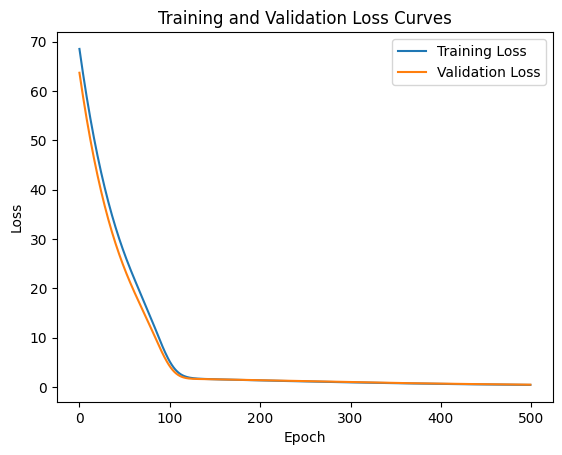

In [6]:
plt.plot(nn.train_losses, label='Training Loss')
plt.plot(nn.val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

In [7]:
predictions = nn.predict(X_val)

mse = nn.compute_mse(y_val, predictions)
print(f"Mean Squared Error on Test Set: {mse}")

Mean Squared Error on Test Set: 0.4962126628942881


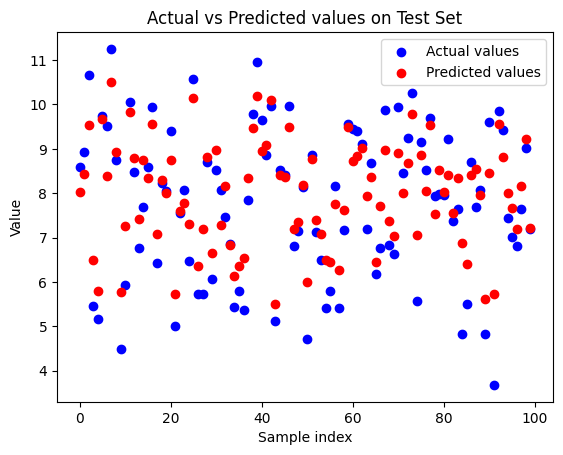

In [8]:
plt.scatter(range(len(y_val)), y_val, color='blue', label='Actual values')
plt.scatter(range(len(y_val)), predictions, color='red', label='Predicted values')
plt.xlabel('Sample index')
plt.ylabel('Value')
plt.title('Actual vs Predicted values on Test Set')
plt.legend()
plt.show()